<a href="https://colab.research.google.com/github/EvgenyEsin/Machine_learning/blob/main/Machine_learning_lesson_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные техники подготовки данных

Практика. Заполняем пропуски
Давайте рассмотрим на примере заполнение пропусков. Для этого воспользуемся
набором данных о стоимости автомобиля Мерседес. Это часть большого датасета,
который содержит более ста тысяч записей.

In [26]:
import pandas as pd
df = pd.read_csv('merc.csv')
df.shape

(13119, 9)

In [27]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


Посмотрим, из чего состоит датасет. Модель, год выпуска, цена — это наша целевая
переменная, тип коробки передач, пробег в милях, тип топлива, величина налога,
расход топлива и объем двигателя.
Первое, что мы с вами попробуем сделать — удалить пропуски. То есть удалить
строки с пропусками. Сколько должно быть пропусков, чтобы можно было удалить
такие строки? Единого правила не существует. Проверим, какие признаки содержат
пропуски.
Давайте руководствоваться таким правилом. Обычно, чтобы удалить строку или
столбец с пропусками из данных, нужно чтобы пропусков было так много, что
восстановление значений на их месте не имеет смысла. Давайте в нашем случае
считать, что если признак содержит более 50 процентов пропусков, то мы можем
его удалить. Строку мы можем удалить, если она содержит пять и более пропусков.
Сначала посмотрим, сколько пропусков содержится в каждом признаке.

In [28]:
df.isna().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


Метод isna для каждой ячейки проверяет, пропущено в ней значение или нет.Затем
мы используем метод sum чтобы просуммировать количество пропусков в каждом
признаке.

Некоторые признаки не содержат пропусков. А в остальных их примерно равное
количество.Давайте посмотрим на процент пропусков в каждом признаке. Для
этого разделим значения на количество записей в датафрейме.

In [29]:
df.isna().sum() / df.shape[0]

,0
model,0.0
year,0.0
price,0.0
transmission,0.0
mileage,0.0
fuelType,0.0
tax,0.0
mpg,0.0
engineSize,0.0


Получим около 30 процентов. То есть ни один из признаков мы не можем удалить.
Давайте теперь просуммируем пропуски по строкам и посмотрим, в скольких из них
пропущено пять и более значений.
Давайте просуммируем наши пропуски и посмотрим сколько же там пропущено
значений.

In [30]:
df_miss_row = df[df.isna().sum(axis=1) >= 5]
df_miss_row.shape

(0, 9)

Таких записей 133. Давайте их просто удалим из набора данных.

In [31]:
df = df[df.isna().sum(axis=1) < 5]

In [32]:
df.shape

(13119, 9)

Готово. На всякий случай проверим проверим свою работу.

In [33]:
df[df.isna().sum(axis=1) >= 5]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


Мы удалили записи с большим количеством пропусков. Теперь давайте поговорим о
том, как мы можем заполнить оставшиеся пропуски. Есть есть несколько методик.
Можно заполнить средними значениями, можно заполнить медианными
значениями, можно запонлнить нулем. В нашем случае, например расход топлива
может быть равен нулю, потому что это электроавтомобиль. Если мы хотим
воспользоваться медианой или средним арифтметическим, нужно разделить наш
датасет на обучающую и тестовые выборки. Это нужно для того, чтобы оценки
нашей модели в дальнейшем были корректны.
Делим датасет.

In [34]:
from sklearn.model_selection import train_test_split
random_state = 42
X_train, X_test = train_test_split(df, test_size=0.2, random_state=random_state)

Заполним пропуски в признаках налога и пробега заполним нулями, а в признаке
модели значением неизвестно. Ав признакаха расхода топлива и объема двигателя
- медианным значением этих признаков. В отличии от пробега и налога эти
признаки не могут быть равны нулю. Для начала импортируем предпроцессор,
который мы будем использовать для заполнения пропусков.

In [35]:
from sklearn.impute import SimpleImputer

Для того чтобы заполнять признаки константным значением, передадим
следующие аргументы:

In [36]:
imp_const_0 = SimpleImputer(strategy='constant', fill_value=0)

Пропуски в пробеге и налоге заполним нулями.

In [37]:
zero_cols = ['mileage', 'tax']

И посмотрим на результат.

In [38]:
X_train[zero_cols] = imp_const_0.fit_transform(X_train[zero_cols])
X_train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7765,C Class,2019,34579,Semi-Auto,1000,Petrol,145,44.1,1.5
4007,GLE Class,2017,33142,Automatic,27661,Diesel,145,42.8,3.0
274,C Class,2018,20685,Semi-Auto,21929,Diesel,145,64.2,2.1
1281,C Class,2016,18700,Semi-Auto,33237,Diesel,125,58.9,2.1
6062,C Class,2019,29995,Semi-Auto,9,Petrol,145,42.8,2.0


Убедимся, что все пропуски были заполнены

In [39]:
X_train[zero_cols].isna().sum()

,0
mileage,0
tax,0


Аналогично заполним пропуски в признаке model

In [40]:
imp_const_unknown = SimpleImputer(strategy='constant', fill_value='unknown')
unk_cols = ['model']
X_train[unk_cols] = imp_const_unknown.fit_transform(X_train[unk_cols])
X_train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7765,C Class,2019,34579,Semi-Auto,1000,Petrol,145,44.1,1.5
4007,GLE Class,2017,33142,Automatic,27661,Diesel,145,42.8,3.0
274,C Class,2018,20685,Semi-Auto,21929,Diesel,145,64.2,2.1
1281,C Class,2016,18700,Semi-Auto,33237,Diesel,125,58.9,2.1
6062,C Class,2019,29995,Semi-Auto,9,Petrol,145,42.8,2.0


А теперь заполним пропуски в признаках, про которые мы говорили выше,
медианным значением.

In [41]:
imp_median = SimpleImputer(strategy='median')
med_cols = ['mpg', 'engineSize']
X_train[med_cols] = imp_median.fit_transform(X_train[med_cols])
X_train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7765,C Class,2019,34579,Semi-Auto,1000,Petrol,145,44.1,1.5
4007,GLE Class,2017,33142,Automatic,27661,Diesel,145,42.8,3.0
274,C Class,2018,20685,Semi-Auto,21929,Diesel,145,64.2,2.1
1281,C Class,2016,18700,Semi-Auto,33237,Diesel,125,58.9,2.1
6062,C Class,2019,29995,Semi-Auto,9,Petrol,145,42.8,2.0


Проверим заполнение пропусков

In [42]:
X_train[med_cols].isna().sum()

,0
mpg,0
engineSize,0


У нас остался еще один признак с пропусками - год выпуска. Давайте используем
метод к ближайших соседей. Мы будем искать пропуски, а затем найдем соседей, и
посмотрим, какие значения там.

Будем брать трех ближайших соседей. Будем использовать только численные
признаки.

In [43]:
from sklearn.impute import KNNImputer
imp_knn = KNNImputer(n_neighbors=3)
num_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize']


Пройдемся сразу по всем численным признакам, чтобы результат был точным

In [44]:
X_train[num_columns] = imp_knn.fit_transform(X_train[num_columns])
X_train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7765,C Class,2019.0,34579,Semi-Auto,1000.0,Petrol,145.0,44.1,1.5
4007,GLE Class,2017.0,33142,Automatic,27661.0,Diesel,145.0,42.8,3.0
274,C Class,2018.0,20685,Semi-Auto,21929.0,Diesel,145.0,64.2,2.1
1281,C Class,2016.0,18700,Semi-Auto,33237.0,Diesel,125.0,58.9,2.1
6062,C Class,2019.0,29995,Semi-Auto,9.0,Petrol,145.0,42.8,2.0


Готово, теперь проверим результат нашей работы

In [45]:
X_train.isna().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


Теперь сделаем все тоже самое на тестовой выборке.

In [46]:
X_test[zero_cols] = imp_const_0.transform(X_test[zero_cols])
X_test[unk_cols] = imp_const_unknown.transform(X_test[unk_cols])
X_test[med_cols] = imp_median.transform(X_test[med_cols])
X_test[num_columns] = imp_knn.transform(X_test[num_columns])
X_train.to_csv('merc_train.csv', index=False)
X_test.to_csv('merc_test.csv', index=False)

Ну что же, мы изучили все методы появления пропусков, и основные методы их
заполнения. Едем дальше.


## Борьба с выбросами
Выбросы — не явные аномалии в наших данных. Это объекты, которые не
вписываются в природу данных. Выбросы часто нельзя увидеть без
предварительной обработки данных, а всего лишь один выброс может вызвать
некорректную работу нашей модели.
Есть еще одно понятие, с которым мы столкнемся — аномалия. Это понятие чем то
напоминает выброс, тем не менее, относится к природе наших данных.
Как же распознать, что перед нами — выброс или аномалия? В таком случае нужно
руководствоваться данными, как бы очевидно это не звучало. Например, если мы
анализируем покупку товаров в магазинах, и в какой-то день видим, что средний
чек сильно больше, чем в другие дни, это аномалия, так как скорее всего это
связано с праздничным днем.
В таком примере выброс, это, скорее всего, отклонение, которое ни с, чем не
связано.
💡Часто, между этими двумя понятиями ставят знак равно, называя эти
понятия синонимами. Давайте сейчас, и в дальнейшем, различать эти
понятия, так как выбросы относятся скорее к ошибкам в данных, тогда
как аномалии — это значения, на которые нужно смотреть через призму
данных. Аномалии — это еще не ошибки в данных. Выбросы — это точно
ошибки в данных.
Практика. Выбросы и аномалии
Давайте на примере рассмотрим способы борьбы и самое главное определения
аномалия и выбросов. Для этого воспользуемся все тем же датасетом.

In [47]:
import pandas as pd
df = pd.read_csv('merc_train.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,C Class,2019.0,34579,Semi-Auto,1000.0,Petrol,145.0,44.1,1.5
1,GLE Class,2017.0,33142,Automatic,27661.0,Diesel,145.0,42.8,3.0
2,C Class,2018.0,20685,Semi-Auto,21929.0,Diesel,145.0,64.2,2.1
3,C Class,2016.0,18700,Semi-Auto,33237.0,Diesel,125.0,58.9,2.1
4,C Class,2019.0,29995,Semi-Auto,9.0,Petrol,145.0,42.8,2.0


У нас есть как численные так и категориальные признаки. Давайте посмотрим
сначала на численные признаки и поищем там аномалии. Попробуем самый
простой метод - визуализации признаков. Создадим диаграммы по числовым
признакам.

Histogram for year


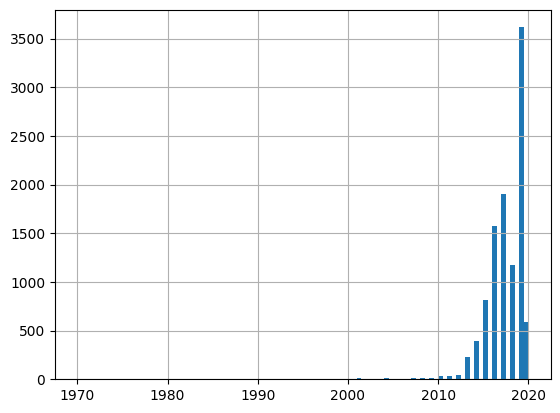

Histogram for price


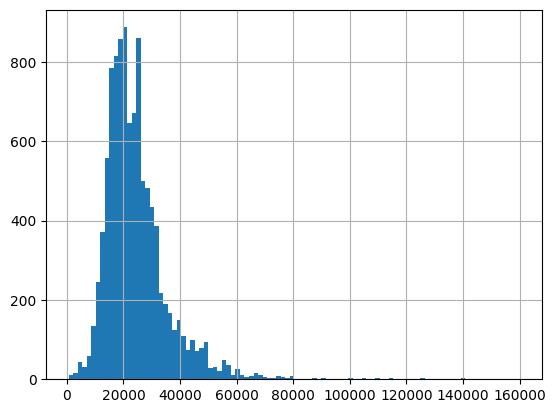

Histogram for mileage


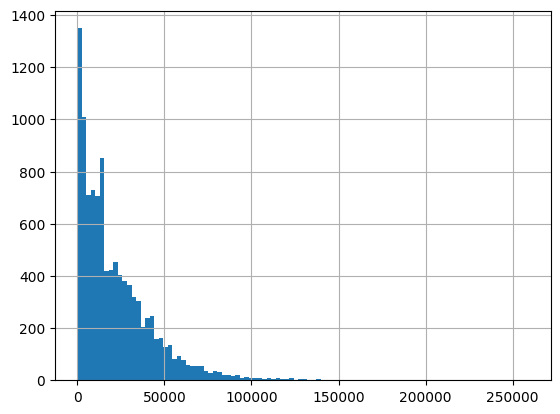

Histogram for tax


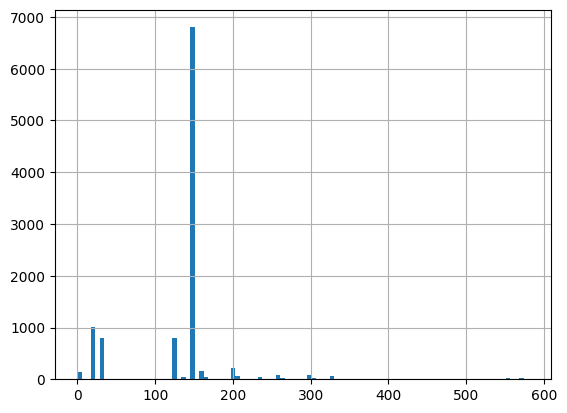

Histogram for mpg


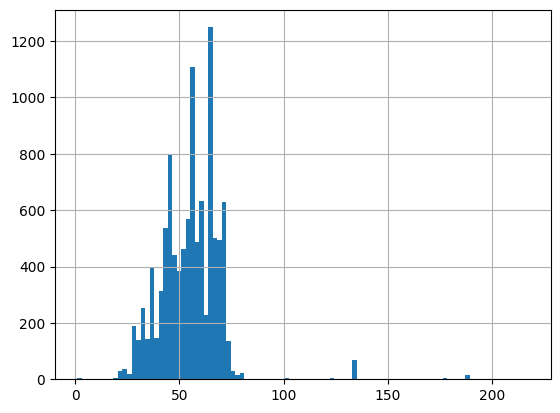

Histogram for engineSize


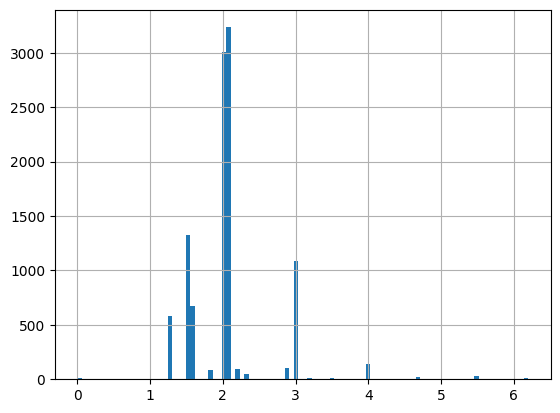

In [50]:
import matplotlib.pyplot as plt
num_cols = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
for col in num_cols:
  print(f'Histogram for {col}')
  df[col].hist(bins=100)
  plt.show()

Видно что в расходе топлива у нас явный выброс. Давайте найдем этот выброс с
помощью метода межквартильного расстояния. Немного статистикки:
Межквартильное расстояние это расстояние между 25 и 75 процентов в данных.

In [51]:
def calculate_iqr_boundaries(series):
  q25 = series.quantile(0.25)
  q75 = series.quantile(0.75)
  iqr = q75 - q25
  boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
  return boundaries

  Посмотрим на графике

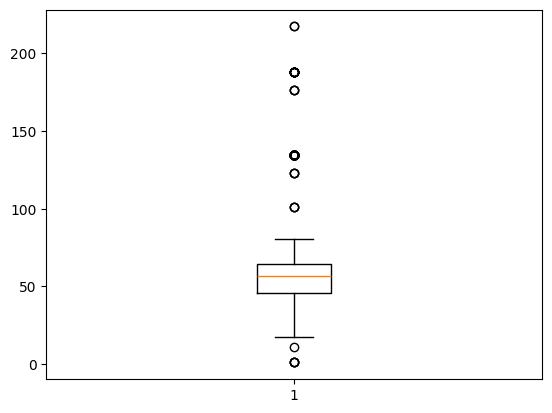

In [52]:
plt.boxplot(df.mpg)
plt.show()

На этом графике показана медиана признака расхода топлива. Она показана
оранжевой линией. Усы - межквартилньое расстояние. Круглые точки выше и
ниже усов - выбросы.
Посмотрим, где должны быть значения признака, чтобы не быть выбросом.

In [53]:
mpg_bounds = calculate_iqr_boundaries(df['mpg'])
mpg_bounds

(17.7, 92.10000000000001)

Расход топлива лежащий вне этого диапозона мы можем посчитать выбросами и
удалить.И посмотрим сколько записей останется после удаления выбросов.

In [54]:
df_1 = df[(df['mpg'] >= mpg_bounds[0]) & (df['mpg'] <= mpg_bounds[1])]
print(df_1.shape[0])
print(df_1.shape[0] / df.shape[0])

10395
0.9904716531681753


Примерно 5 процентов данных мы удалили.

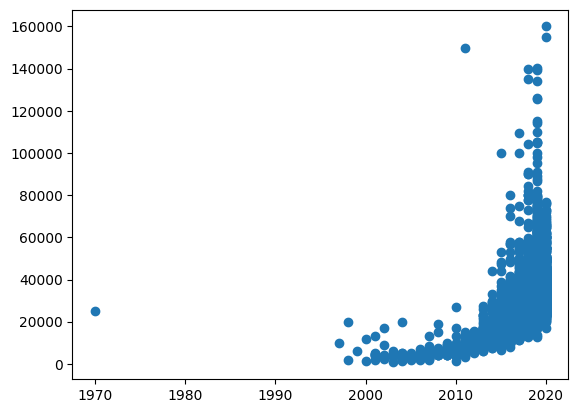

In [55]:
plt.scatter(df_1['year'], df_1['price'])

Теперь поговорим про выбросы в категориальных переменных. В таких признаках
выбросом можно считать категорию, которая встречается достаточно редко.
Посмотрим распределение признаков во fueltype

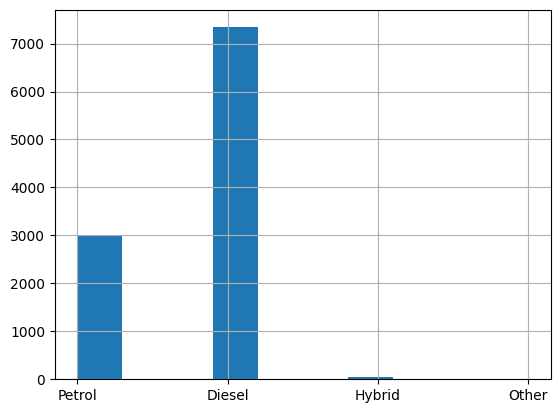

In [59]:
df_2 = df_1
df_2['fuelType'].hist()
plt.show()

Категория гибрид встречается достаточно редко. а котегория other еще реже.
Давайте соединим все маловстречающиеся категории. Мы конечно можем
сделать это явно, а можем посчитать частоту появления категорий и определить
пороговое значение частоты категорий для объединения в одну. Тогда те
категории, которые встречаются чаще заданного порогового значения, будут
оставлены как есть, а остальные редкие категории объединяться в одну.
Сначала посчитаем количество точек данных, принадлежащих каждой из
категорий.

In [60]:
serie = df_2['fuelType'].value_counts()
serie

,count
fuelType,
Diesel,7340
Petrol,3011
Hybrid,42
Other,2


Определим процентное отношение этих категорий в признаке.

In [61]:
serie = serie / serie.sum() * 100
serie

,count
fuelType,
Diesel,70.610871
Petrol,28.965849
Hybrid,0.404040
Other,0.019240


Встречаются в 70 процентах, встречаются в одной сотой процента записей.
Давайте установим порог объединения категорий в пять процентов. Такой порог
зависит только от вашего видения данных.
Определяем список категорий, который мы оставляем как есть

In [62]:
keep_cats = serie[serie > 5].index
keep_cats

Index(['Diesel', 'Petrol'], dtype='object', name='fuelType')

Теперь заменим все остальные категории на other.

<ipython-input-63-a53d6b8636ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['fuelType'] = np.where(df_2['fuelType'].isin(keep_cats), df_2['fuelType'], 'Other')


<Axes: >

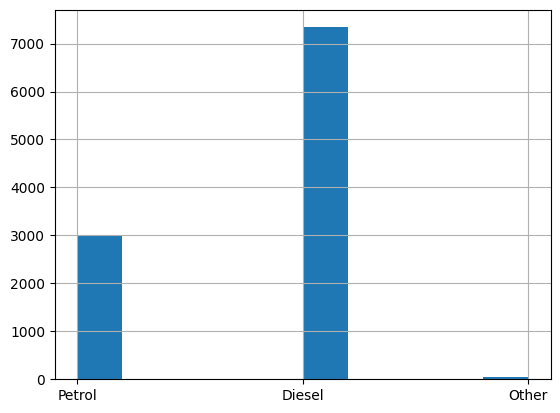

In [63]:
import numpy as np
df_2['fuelType'] = np.where(df_2['fuelType'].isin(keep_cats), df_2['fuelType'], 'Other')
df_2['fuelType'].hist()

Мы сгруппировали редкие значения категорий в одну частую. Сохраним
полученный датафрейм.

In [64]:
df_2.to_csv('merc_train.csv', index=False)

Подведем итоги
Нормализация данных
Нормализация — это приведение численных признаков к одному диапазону. В
машинном обучении стараются привести признаки в диапазон от нуля до единицы
для удобства.
Допустим цена на квартиру измеряется в миллионах, а количество комнат в
квартире — в единицах. Такой масштаб в машинном обучении принято
нормализовать, иначе не ясно, какие цифры в итоге получатся, и что они будут
значить.
Цель нормализации — сходимость алгоритмов машинного обучения. Сходимость
алгоритма — это способность алгоритма, когда в процессе обучения функция потерь
движется к своему минимуму. Чем быстрее значение функции потерь движется к
минимуму, тем быстрее алгоритм сходится(обучается)
Практика. Нормализация данных
Для начала загрузим набор данных, и посмотрим, из каких признаков он состоит.

In [65]:
import pandas as pd
df = pd.read_csv('merc_train.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,C Class,2019.0,34579,Semi-Auto,1000.0,Petrol,145.0,44.1,1.5
1,GLE Class,2017.0,33142,Automatic,27661.0,Diesel,145.0,42.8,3.0
2,C Class,2018.0,20685,Semi-Auto,21929.0,Diesel,145.0,64.2,2.1
3,C Class,2016.0,18700,Semi-Auto,33237.0,Diesel,125.0,58.9,2.1
4,C Class,2019.0,29995,Semi-Auto,9.0,Petrol,145.0,42.8,2.0


Допустим, перед нами стоит задача предсказать целевую переменную, то есть цену
автомобиля. Возьмем три признака — пробег, налог, и расход топлива. Создадим
отдельный датафрейм с этими признаками и посмотрим на масштаб признаков.

In [66]:
df_1 = df[['price', 'mileage', 'tax', 'mpg']]
df_1.describe()

,price,mileage,tax,mpg
count,10395.000000,10395.000000,10395.000000,10395.000000
mean,24645.652814,21882.673401,130.162097,54.326407
std,11652.942611,21291.054542,64.450880,12.093271
min,650.000000,1.000000,0.000000,17.800000
25%,17399.000000,6000.000000,125.000000,45.600000
50%,22480.000000,15026.000000,145.000000,56.500000
75%,28982.500000,31599.500000,145.000000,64.200000
max,159999.000000,259000.000000,580.000000,80.700000


Очевидно, что признаки имеют разный масштаб. Рассмотрим первый способ —
стандартизация. Это масштабирование признака таким образом, что среднее
значение его элементов станет равно нулю, а стандартное отклонение — единица.
Соответственно у каждого признака будет свое числовое значение и свое
стандартное отклонение. Поэтому после стандартизации масштаб этих признаков
будет одинаковым.
Для стандартизации используем класс стандарт скелер.

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Масштабировать мы будем только обучающую выборку. Это делается для того,
чтобы проверить стандартизированные данные на реальных и понять, как работает
модель. Еще один важный момент — обычно целевую переменную не
масштабируют.

In [68]:
X_train = df[['mileage', 'tax', 'mpg']]
y_train = df['price']
X_train_s = scaler.fit_transform(X_train)
X_train_s

array([[-0.9808663 ,  0.2302314 , -0.84566857],
       [ 0.27140997,  0.2302314 , -0.95317155],
       [ 0.00217598,  0.2302314 ,  0.81649277],
       ...,
       [ 1.26004172, -1.70932339,  1.65170818],
       [ 0.79381411, -1.70932339,  0.81649277],
       [-0.97034495,  0.2302314 , -1.0027883 ]])

нам вернулась матрица. Так работает метод sklearn. Давайте на ее основе создадим
датафрейм

In [69]:
df_X_s = pd.DataFrame(X_train_s, columns=X_train.columns)
df_X_s.describe()

,mileage,tax,mpg
count,1.039500e+04,1.039500e+04,1.039500e+04
mean,-5.468342e-18,8.612639e-17,1.326073e-16
std,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.027790e+00,-2.019652e+00,-3.020536e+00
25%,-7.460146e-01,-8.009736e-02,-7.216267e-01
50%,-3.220603e-01,2.302314e-01,1.797444e-01
75%,4.564027e-01,2.302314e-01,8.164928e-01
max,1.113748e+01,6.979882e+00,2.180954e+00


Мы видим что среднее находиться очень близко к нулю.
Давайте рассмотрим еще один пример нормализации — минимаксную
нормализацию. Чаще всего ее называют просто нормализацией. Смысл такой
нормализации — каждый признак масштабируется таким образом, что его
минимальное значение равно нулю - а максимальное — единице. Импортируем
специальный класс.

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
mmscaler = MinMaxScaler()
X_train_mm = mmscaler.fit_transform(X_train)
X_train_mm
df_sc_x = pd.DataFrame(X_train_mm, columns=X_train.columns)
df_sc_x.describe()
lr3 = LinearRegression()
lr3.fit(X_train_mm, y_train)

LinearRegression()

In [75]:
from sklearn.metrics import mean_squared_error
y_pred = lr3.predict(X_train_mm)
mean_squared_error(y_train, y_pred)

67528623.6872648

Минимаксная, а точнее просто нормализация крайне чувствительна к выбросам и
аномалиям. Есть в каком то признаке есть аномалия, которую мы удалять не
планируем, значения аномалий будут примерно равны единице, а все остальные
точки данных будут лежать примерно около нуля. Обычно такая минимизация
применяется там, где границы признаков известны и зафиксированы. Часто такую
нормализацию применяют в работе с изображениями, так как после
преобразования у нас известен масштаб — разрешение изображения, и значения
пикселя каждого цвета и аномалий мы точно не ждем.
В некоторых алгоритмах нам вообще не важно, какое значение признаков будет
лежать в алгоритме. Но нормализованные данные удобнее интерпретировать.


## Работа с категориями
Как мы помним, модели, по крайне мере линейные, не умеют работать с
категориальными признаками. Давайте рассмотрим, как категориальные признаки
преобразовать в числовые.
Категориальные признаки часто встречаются в реальных данных. Как минимум в
нашем наборе данных — марка машины, цвет машины, это все категориальные
признаки. Давайте научимся их преобразовывать.


Практика. Работа с категориальными признаками
Определение категориальных признаков мы давали на одном из первых занятий.
Напомню, это признаки, у которых значение зависит от них же. Более формально —
это конечное множество характеристик объекта. Например — название города, или
цвет ноутбука. Мы понимаем, что у ноутбука из линейки всего три цвета, и можем
использовать это как мощный признак при обучении.
К сожалению, большинство моделей машинного обучения умеют работать только с
числами. Поэтому категориальные данные нужно дополнительно готовить к
использованию. Давайте рассмотрим, как работать с такими признаками, на
примере нашего датасета.

In [76]:
import pandas as pd
df = pd.read_csv('merc_train.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,C Class,2019.0,34579,Semi-Auto,1000.0,Petrol,145.0,44.1,1.5
1,GLE Class,2017.0,33142,Automatic,27661.0,Diesel,145.0,42.8,3.0
2,C Class,2018.0,20685,Semi-Auto,21929.0,Diesel,145.0,64.2,2.1
3,C Class,2016.0,18700,Semi-Auto,33237.0,Diesel,125.0,58.9,2.1
4,C Class,2019.0,29995,Semi-Auto,9.0,Petrol,145.0,42.8,2.0


Есть несколько признаков, которые принимают конечное значение - модель
автомобиля, тип коробки передач и тип двигателя. Посмотрим на тип данных таких
признаков.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10395 non-null  object 
 1   year          10395 non-null  float64
 2   price         10395 non-null  int64  
 3   transmission  10395 non-null  object 
 4   mileage       10395 non-null  float64
 5   fuelType      10395 non-null  object 
 6   tax           10395 non-null  float64
 7   mpg           10395 non-null  float64
 8   engineSize    10395 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 731.0+ KB


Как видим - object

Теперь посмотрим на описательные характеристики каждого из признаков.

In [78]:
df.describe(include=['object'])

,model,transmission,fuelType
count,10395,10395,10395
unique,26,4,3
top,C Class,Semi-Auto,Diesel
freq,2938,5475,7340


в признаке модел мы видим 25 категорий, в признаке transmission мы видим 4
категории, и в признаке fuelType 3 категории
Давайте посмотрим на список значений каждого признака

In [80]:
cat_features = ['model', 'transmission', 'fuelType']
for feat in cat_features:
  print(f'{feat}: {df[feat].unique()}')

model: [' C Class' ' GLE Class' ' GLA Class' ' A Class' ' CLS Class' ' X-CLASS'
 ' E Class' ' GLC Class' ' SL CLASS' ' B Class' ' CLA Class' ' S Class'
 ' SLK' ' CL Class' ' V Class' ' M Class' ' GLS Class' ' R Class'
 ' GL Class' ' CLC Class' '180' ' CLK' ' G Class' ' GLB Class' '220' '230']
transmission: ['Semi-Auto' 'Automatic' 'Manual' 'Other']
fuelType: ['Petrol' 'Diesel' 'Other']


Отметим, что некоторые категории это числа, которые записаны в строку
Рассмотрим несколько видов использования категориальных данных в модели. Для
начала нам нужно научиться преобразовывать категориальные данные в числа.
Начнем с самого простого метода label encoding. Этот метод просто, потому что мы
просто нумеруем список значений категориального признака. Давайте рассмотрим
этот прием на примере модели автомобиля.
Импортируем класс предпроцессор label encoder

In [81]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Теперь создадим новый признак соответствующий закодированным признакам
модели

In [82]:
df['model_le'] = encoder.fit_transform(df['model'])
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_le
0,C Class,2019.0,34579,Semi-Auto,1000.0,Petrol,145.0,44.1,1.5,2
1,GLE Class,2017.0,33142,Automatic,27661.0,Diesel,145.0,42.8,3.0,14
2,C Class,2018.0,20685,Semi-Auto,21929.0,Diesel,145.0,64.2,2.1,2
3,C Class,2016.0,18700,Semi-Auto,33237.0,Diesel,125.0,58.9,2.1,2
4,C Class,2019.0,29995,Semi-Auto,9.0,Petrol,145.0,42.8,2.0,2


Видим что каждой модели соответствует какое либюо число, а одинаковым
моделям одинаковое число. Давайте разберемся каким образом происходит это
преобразование

In [83]:
encoder.classes_

array([' A Class', ' B Class', ' C Class', ' CL Class', ' CLA Class',
       ' CLC Class', ' CLK', ' CLS Class', ' E Class', ' G Class',
       ' GL Class', ' GLA Class', ' GLB Class', ' GLC Class',
       ' GLE Class', ' GLS Class', ' M Class', ' R Class', ' S Class',
       ' SL CLASS', ' SLK', ' V Class', ' X-CLASS', '180', '220', '230'],
      dtype=object)

видим список моделей, отсортированных в алфавитном порядке. Каждая категория
отображается индексом это модели, давайте посмотрим это.

In [84]:
for i, e in enumerate(encoder.classes_):
  print(f'{i}: {e}')

0:  A Class
1:  B Class
2:  C Class
3:  CL Class
4:  CLA Class
5:  CLC Class
6:  CLK
7:  CLS Class
8:  E Class
9:  G Class
10:  GL Class
11:  GLA Class
12:  GLB Class
13:  GLC Class
14:  GLE Class
15:  GLS Class
16:  M Class
17:  R Class
18:  S Class
19:  SL CLASS
20:  SLK
21:  V Class
22:  X-CLASS
23: 180
24: 220
25: 230


При таком кодировании есть большой минус label encoder явно вносит отношение
сравнения в категории. То есть v class будет лучше, чем c class в семь раз.
Естественно в реальности таких отношений между категориями не существует, но
модель будет считать что они есть, и делать неправильные выводы.
Поэтому label encoding применяют для тех признаков, у которых явно есть
отношения сравнения. Например, анкетирования или соц опросы, в которых есть
ответы плохо, хорошо, нейтрально. Здесь явно есть отношения зависимости, так как
хорошо, это точно лучше, чем нейтрально.
Мы воспользуемся другим методом — one-hot encoding. Рассмотрим его на примере
типа топлива. Идея такого метода в том, что вместо одного категориального
признака с тремя категориями мы создаем три бинарных признака — по одному
признаку на каждое значение категории и заполняем их так, что в каждой строке
единицей заполняется тот признак, который соответствует исходному значению
категории, а остальные заполняются нулями. Давайте посмотрим как это работает.
Импортируем предпроцессор.

Совершим следующие действия — передадим конструктору параметр sparse False.
Если сделать иначе, результат будет в виде матрицы. Создадим отдельный
датафрейм для результата.
Еще один нюанс: если в строке есть хоть одна единица, то сумма трех получившихся
признаков будет равна единице. У нас получается линейная зависимость и с ней
нужно, что-то сделать. Поэтому мы будем удалять один из сгенерированных
признаков, а точнее первый, передадим параметр drop = first
Третий аргумент — существую ситуации, когда количество категорий в обучающей и
тестовой выборки различаются. Допустим вышла новая машина. Этот параметр
присваивает всем новым категориям метку ноль

In [100]:
!pip install --upgrade scikit-learn

In [101]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
ft = ohe.fit_transform(df[['fuelType']])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
df_ft.head()

,fuelType_Other,fuelType_Petrol
0,0.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0


In [102]:
df_1 = pd.concat([df, df_ft], axis=1)
df_1

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_le,fuelType_Other,fuelType_Petrol
0,C Class,2019.0,34579,Semi-Auto,1000.0,Petrol,145.0,44.1,1.5,2,0.0,1.0
1,GLE Class,2017.0,33142,Automatic,27661.0,Diesel,145.0,42.8,3.0,14,0.0,0.0
2,C Class,2018.0,20685,Semi-Auto,21929.0,Diesel,145.0,64.2,2.1,2,0.0,0.0
3,C Class,2016.0,18700,Semi-Auto,33237.0,Diesel,125.0,58.9,2.1,2,0.0,0.0
4,C Class,2019.0,29995,Semi-Auto,9.0,Petrol,145.0,42.8,2.0,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10390,C Class,2019.0,22980,Automatic,11287.0,Diesel,145.0,58.9,1.6,2,0.0,0.0
10391,C Class,2016.0,21500,Semi-Auto,37188.0,Diesel,20.0,67.3,2.1,2,0.0,0.0
10392,A Class,2017.0,17200,Semi-Auto,48709.0,Diesel,20.0,74.3,1.5,0,0.0,0.0
10393,C Class,2015.0,14500,Semi-Auto,38783.0,Diesel,20.0,64.2,2.1,2,0.0,0.0
